In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

Simula y visualiza una distribución Poisson con parámetro lambda = 2.5 y una muestra de 1000. Esto significa que, en promedio, ocurren 2.5 terremotos de magnitud mayor a 8.5 en la escala de Richter durante un año. 

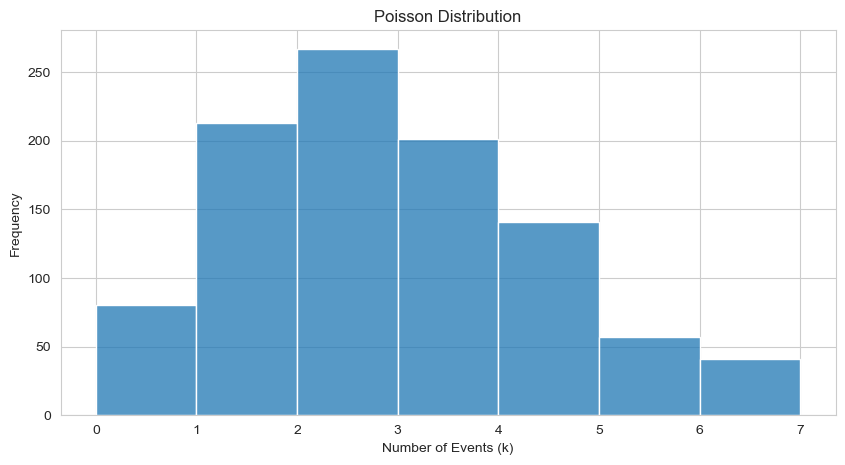

In [4]:
# Set parameters
lambda_value = 2.5
sample_size = 1000

poisson_data = np.random.poisson(lam=lambda_value, size=sample_size)

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(poisson_data, bins=range(0, max(poisson_data)+1))

plt.xlabel("Number of Events (k)")
plt.ylabel("Frequency")
plt.title("Poisson Distribution")
plt.show()

Con esta simulación, modela el número de terremotos que pueden ocurrir por año durante los siguientes 1000 años.

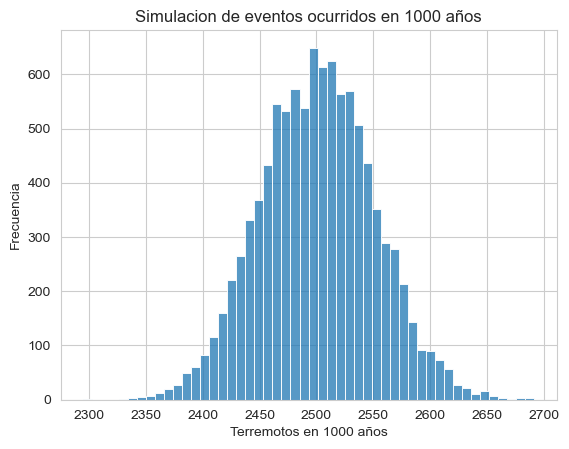

In [5]:
# Cantidad de ocurrencias esperadas en 1000 años
lambda_1000 =  2.5 * 1000

# Simular el numero de eventos en 1000 años
ocurrencias = poisson.rvs(mu=lambda_1000, size=10000)

sns.histplot(ocurrencias, bins=50)
plt.xlabel("Terremotos en 1000 años")
plt.ylabel("Frecuencia")
plt.title("Simulacion de eventos ocurridos en 1000 años")
plt.show()

---

Usa el set de datos marketing_campaign.csv y realiza una prueba de hipótesis para contrastar si el número de compras en línea (NumWebPurchases) tiene alguna relevancia con el número de visitas a la página web (NumWebVisitsMonth). 

In [6]:
import pandas as pd
import os
os.chdir("E:/EBAC/Material/M32-EstadisticaInferencial")
data = pd.read_csv("marketing_campaign (2).csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


* Hipótesis Nula: No hay relacion en el numero de compras en linea (NumWebPurchases) con el numero de visitas de la pagina (NumWebVisitsMonth)
* Hipótesis Alternativa: El numero de visitas de la pagina influye en el numero de compras

<Axes: xlabel='NumWebVisitsMonth', ylabel='NumWebPurchases'>

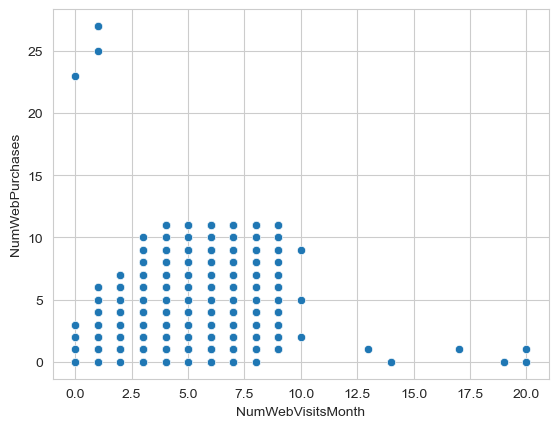

In [19]:
# Visualizacion de la relacion entre las dos variables
sns.scatterplot(data=data, x='NumWebVisitsMonth', y='NumWebPurchases')

La informacion aunque no es completamente clara, muestra una correlacion linear con algunos outliers

Agrupa la información en dos categorías: clientes con alto número de visitas (> 5) y bajo número de visitas (≤ 5). Realiza una prueba ANOVA para este análisis.

<Axes: xlabel='NumWebVisitsMonth', ylabel='NumWebPurchases'>

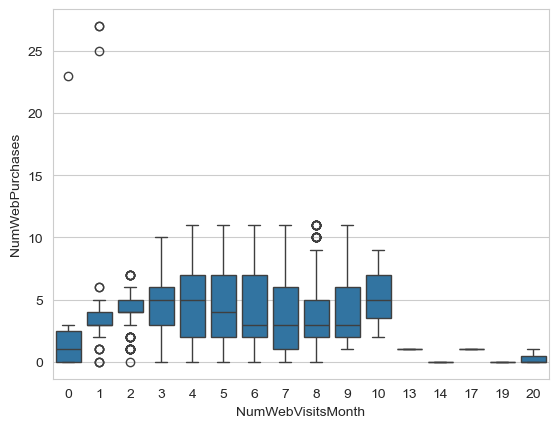

In [13]:
sns.boxplot(y = data['NumWebPurchases'], x =data['NumWebVisitsMonth'])

In [11]:
NumWebVisitsMonth_0 = data[data['NumWebVisitsMonth']>5]['NumWebVisitsMonth']
NumWebVisitsMonth_1 = data[data['NumWebVisitsMonth']<=5]['NumWebVisitsMonth']

In [20]:
# Prueba estadística
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(NumWebVisitsMonth_0, NumWebVisitsMonth_1)
print('f-statistics:', f_stat, '\np-value', p_value)

if p_value < 0.05:
    print('Rechazar hipotesis nula: las visitas web estan relacionadas a las compras')
elif p_value >= 0.05:
    print('No hay suficiente evidencia para rechazar hipotesis nula')

f-statistics: 4771.966591081742 
p-value 0.0
Rechazar hipotesis nula: las visitas web estan relacionadas a las compras


In [21]:
# Prueba alterna utilizando la prueba de correlacion Pearson

import scipy.stats as stats
import pandas as pd

# Pearson Correlation Test
corr, p_value = stats.pearsonr(data['NumWebVisitsMonth'], data['NumWebPurchases'])

print(f"Coefficiente de correlacion Pearson: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Rechazar hipotesis nula: las visitas web estan relacionadas a las compras")
else:
    print("No hay suficiente evidencia para rechazar hipotesis nula")


Coefficiente de correlacion Pearson: -0.0558
P-value: 0.0082
Rechazar hipotesis nula: las visitas web estan relacionadas a las compras
